https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("/content/Musical_instruments_reviews.csv")
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [5]:
null_review_texts = df[df['reviewText'].isnull()]
null_review_texts

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
2927,AF7AQHLX1UV1Z,B0002H0H4A,Smoothbassman,"[101, 105]",NaN,5.0,The Pop Rocks with the Yeti,1342656000,"07 19, 2012"
4401,AU3GYRAKBUAEU,B000CD1R7K,Jon Norris,"[189, 192]",NaN,4.0,great foot rest,1258416000,"11 17, 2009"
8739,A3N93PUHEMQU34,B004OU2IQG,"L. Su ""Flying train""","[3, 3]",NaN,5.0,To make you sound like a pro,1388102400,"12 27, 2013"
9175,AMEZJVXMSEPY0,B005FKF1PY,M. Luke,"[1, 1]",NaN,5.0,Mini tech for musicians,1319500800,"10 25, 2011"
9306,A3ABAA36CZVYNX,B005M0TKL8,Dave,"[31, 32]",NaN,5.0,"No power = No Sound, But It Sounds GREAT!",1342569600,"07 18, 2012"
9313,A3OEBPVLF35YQL,B005M0TKL8,StratDude,"[20, 21]",NaN,5.0,This would be a must-have at twice the price.,1350172800,"10 14, 2012"
9342,A3OA4DV4L81N1D,B005NACC6M,"P.K. Frary ""Gochugogi""","[4, 4]",NaN,5.0,Great sound and features for the price!,1387411200,"12 19, 2013"


In [6]:
df_cleaned = df.drop(null_review_texts.index)
df_cleaned

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [7]:
columns = ['reviewerID', 'reviewerName', 'unixReviewTime', 'reviewTime']

df_cleaned = df_cleaned.drop(columns=columns)
df_cleaned

,asin,helpful,reviewText,overall,summary
0,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good
1,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake
2,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well
3,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.
...,...,...,...,...,...
10256,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars
10257,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom..."
10258,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.
10259,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10254 entries, 0 to 10260
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        10254 non-null  object 
 1   helpful     10254 non-null  object 
 2   reviewText  10254 non-null  object 
 3   overall     10254 non-null  float64
 4   summary     10254 non-null  object 
dtypes: float64(1), object(4)
memory usage: 738.7+ KB


In [9]:
df_cleaned.isnull().sum()

asin          0
helpful       0
reviewText    0
overall       0
summary       0
dtype: int64

In [10]:
df_cleaned["length"] = df_cleaned["reviewText"].apply(len)
df_cleaned

,asin,helpful,reviewText,overall,summary,length
0,1384719342,"[0, 0]","Not much to write about here, but it does exac...",5.0,good,268
1,1384719342,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,544
2,1384719342,"[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,436
3,1384719342,"[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,206
4,1384719342,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,159
...,...,...,...,...,...,...
10256,B00JBIVXGC,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,39
10257,B00JBIVXGC,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",3027
10258,B00JBIVXGC,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,619
10259,B00JBIVXGC,"[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1644


In [11]:
df_cleaned.dtypes

asin           object
helpful        object
reviewText     object
overall       float64
summary        object
length          int64
dtype: object

In [12]:
df_cleaned["overall"].value_counts()

overall
5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

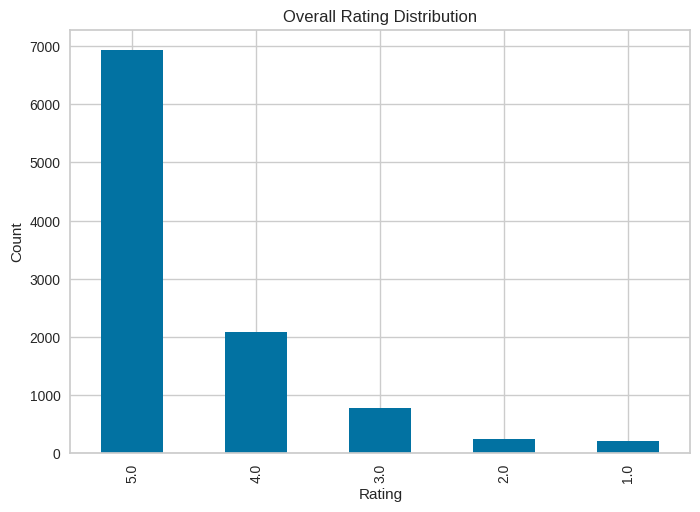

In [13]:
df_cleaned['overall'].value_counts().plot.bar()
plt.title('Overall Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

###**Preprocessing**

In [14]:
df_cleaned['review'] = df_cleaned['reviewText'] + df_cleaned['summary']
df_cleaned = df_cleaned.drop(columns = ['reviewText', 'summary'])
df_cleaned

,asin,helpful,overall,length,review
0,1384719342,"[0, 0]",5.0,268,"Not much to write about here, but it does exac..."
1,1384719342,"[13, 14]",5.0,544,The product does exactly as it should and is q...
2,1384719342,"[1, 1]",5.0,436,The primary job of this device is to block the...
3,1384719342,"[0, 0]",5.0,206,Nice windscreen protects my MXL mic and preven...
4,1384719342,"[0, 0]",5.0,159,This pop filter is great. It looks and perform...
...,...,...,...,...,...
10256,B00JBIVXGC,"[0, 0]",5.0,39,"Great, just as expected. Thank to all.Five Stars"
10257,B00JBIVXGC,"[0, 0]",5.0,3027,I've been thinking about trying the Nanoweb st...
10258,B00JBIVXGC,"[0, 0]",4.0,619,I have tried coated strings in the past ( incl...
10259,B00JBIVXGC,"[0, 0]",4.0,1644,"Well, MADE by Elixir and DEVELOPED with Taylor..."


In [15]:
df_cleaned["overall"].value_counts()

overall
5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: count, dtype: int64

In [16]:
def senti(row):
  if row['overall'] == 3.0:
    val = 'neutral'
  elif row['overall'] > 3.0:
    val = 'positive'
  elif row['overall'] < 3.0:
    val = 'negative'
  else:
    val = -1
  return val

In [17]:
df_cleaned['sentiment'] = df_cleaned.apply(senti, axis = 1)
df_cleaned

,asin,helpful,overall,length,review,sentiment
0,1384719342,"[0, 0]",5.0,268,"Not much to write about here, but it does exac...",positive
1,1384719342,"[13, 14]",5.0,544,The product does exactly as it should and is q...,positive
2,1384719342,"[1, 1]",5.0,436,The primary job of this device is to block the...,positive
3,1384719342,"[0, 0]",5.0,206,Nice windscreen protects my MXL mic and preven...,positive
4,1384719342,"[0, 0]",5.0,159,This pop filter is great. It looks and perform...,positive
...,...,...,...,...,...,...
10256,B00JBIVXGC,"[0, 0]",5.0,39,"Great, just as expected. Thank to all.Five Stars",positive
10257,B00JBIVXGC,"[0, 0]",5.0,3027,I've been thinking about trying the Nanoweb st...,positive
10258,B00JBIVXGC,"[0, 0]",4.0,619,I have tried coated strings in the past ( incl...,positive
10259,B00JBIVXGC,"[0, 0]",4.0,1644,"Well, MADE by Elixir and DEVELOPED with Taylor...",positive


In [18]:
df_cleaned[df_cleaned['sentiment']== 'negative']

,asin,helpful,overall,length,review,sentiment
15,B00005ML71,"[0, 0]",2.0,623,I bought this to use with my keyboard. I wasn'...,negative
50,B000068NW5,"[2, 2]",2.0,387,I didn't expect this cable to be so thin. It's...,negative
52,B000068NW5,"[0, 0]",1.0,245,"It hums, crackles, and I think I'm having prob...",negative
89,B000068NW5,"[0, 0]",1.0,145,I'm a pro-cheapo and I hated this thing. They'...,negative
98,B000068NZC,"[0, 0]",2.0,974,I bought this for my Canon Vixia HF G10 Video ...,negative
...,...,...,...,...,...,...
10171,B00F2PKRJW,"[0, 1]",1.0,331,"I really wanted to like these, but they're a f...",negative
10178,B00FXKIG5I,"[1, 2]",2.0,401,The larger ones sometimes have the neck snap s...,negative
10187,B00GTSM8FW,"[0, 0]",2.0,2097,The tension screw adjustment remains the best ...,negative
10189,B00GTSM8FW,"[1, 1]",2.0,517,"I am a fan of Planet Waves NS capos, but this ...",negative


In [19]:
df_cleaned['sentiment'].value_counts()

sentiment
positive    9015
neutral      772
negative     467
Name: count, dtype: int64

In [20]:
new1 = df_cleaned["helpful"].str.split(",", n = 1, expand = True)
new1.head(2)

,0,1
0,[0,0]
1,[13,14]


In [21]:
new2 = new1[0].str.split("[", n = 1, expand = True)
new2.head(3)

,0,1
0,,0
1,,13
2,,1


In [22]:
new3 = new1[1].str.split("]", n = 1, expand = True)
new3.head(3)

,0,1
0,0,
1,14,
2,1,


In [23]:
new2=new2.drop([0], axis=1)
new3=new3.drop([1], axis=1)

In [24]:
new3.head(3)

,0
0,0
1,14
2,1


In [25]:
helpful=pd.concat([new2, new3], axis=1)
helpful.head(4)

,1,0
0,0,0
1,13,14
2,1,1
3,0,0


In [26]:
helpful.dtypes

1    object
0    object
dtype: object

In [27]:
helpful = helpful.astype(str).astype(int)
helpful.dtypes

1    int64
0    int64
dtype: object

In [28]:
helpful['result'] = helpful[1]/helpful[0]

In [29]:
helpful.head(5)

,1,0,result
0,0,0,NaN
1,13,14,0.928571
2,1,1,1.000000
3,0,0,NaN
4,0,0,NaN


In [30]:
helpful['result'] = helpful['result'].fillna(0)

In [31]:
helpful.head(5)

,1,0,result
0,0,0,0.000000
1,13,14,0.928571
2,1,1,1.000000
3,0,0,0.000000
4,0,0,0.000000


In [32]:
df_cleaned['helpful_rate'] = helpful['result'].round(2)
df_cleaned.head(5)

,asin,helpful,overall,length,review,sentiment,helpful_rate
0,1384719342,"[0, 0]",5.0,268,"Not much to write about here, but it does exac...",positive,0.00
1,1384719342,"[13, 14]",5.0,544,The product does exactly as it should and is q...,positive,0.93
2,1384719342,"[1, 1]",5.0,436,The primary job of this device is to block the...,positive,1.00
3,1384719342,"[0, 0]",5.0,206,Nice windscreen protects my MXL mic and preven...,positive,0.00
4,1384719342,"[0, 0]",5.0,159,This pop filter is great. It looks and perform...,positive,0.00


In [33]:
def cleaning(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [34]:
df_cleaned['review'] = df_cleaned['review'].apply(lambda x: cleaning(x))
df_cleaned.head(5)

,asin,helpful,overall,length,review,sentiment,helpful_rate
0,1384719342,"[0, 0]",5.0,268,not much to write about here but it does exact...,positive,0.00
1,1384719342,"[13, 14]",5.0,544,the product does exactly as it should and is q...,positive,0.93
2,1384719342,"[1, 1]",5.0,436,the primary job of this device is to block the...,positive,1.00
3,1384719342,"[0, 0]",5.0,206,nice windscreen protects my mxl mic and preven...,positive,0.00
4,1384719342,"[0, 0]",5.0,159,this pop filter is great it looks and performs...,positive,0.00


In [35]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
df_cleaned['review'] = df_cleaned['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_cleaned.head(5)

,asin,helpful,overall,length,review,sentiment,helpful_rate
0,1384719342,"[0, 0]",5.0,268,much write exactly supposed filters pop sounds...,positive,0.00
1,1384719342,"[13, 14]",5.0,544,product exactly quite affordablei realized dou...,positive,0.93
2,1384719342,"[1, 1]",5.0,436,primary job device block breath would otherwis...,positive,1.00
3,1384719342,"[0, 0]",5.0,206,nice windscreen protects mxl mic prevents pops...,positive,0.00
4,1384719342,"[0, 0]",5.0,159,pop filter great looks performs like studio fi...,positive,0.00


In [46]:
df_cleaned['polarity'] = df_cleaned['review'].map(lambda text: TextBlob(text).sentiment.polarity)
df_cleaned.head(5)

,asin,helpful,overall,length,review,sentiment,helpful_rate,polarity
0,1384719342,"[0, 0]",5.0,268,much write exactly supposed filters pop sounds...,2,0.00,0.325000
1,1384719342,"[13, 14]",5.0,544,product exactly quite affordablei realized dou...,2,0.93,0.014286
2,1384719342,"[1, 1]",5.0,436,primary job device block breath would otherwis...,2,1.00,0.167500
3,1384719342,"[0, 0]",5.0,206,nice windscreen protects mxl mic prevents pops...,2,0.00,0.333333
4,1384719342,"[0, 0]",5.0,159,pop filter great looks performs like studio fi...,2,0.00,0.800000


##**Feature Extraction**

In [47]:
label_encoder = preprocessing.LabelEncoder()

df_cleaned['sentiment']= label_encoder.fit_transform(df_cleaned['sentiment'])

df_cleaned['sentiment'].unique()


array([2, 1, 0])

In [48]:
df_cleaned['sentiment'].value_counts()

sentiment
2    9015
1     772
0     467
Name: count, dtype: int64

In [49]:
ps = PorterStemmer()

corpus = []
for review in df_cleaned['review']:
    rev = re.sub('[^a-zA-Z]', ' ', review)
    rev = rev.split()
    rev = [ps.stem(word) for word in rev if not word in stop_words]
    rev = ' '.join(rev)
    corpus.append(rev)

In [50]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))

X= tfidf_vectorizer.fit_transform(df_cleaned['review'])

In [51]:
corpus[0]

'much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit pricinggood'

In [52]:
df_cleaned.head(5)

,asin,helpful,overall,length,review,sentiment,helpful_rate,polarity
0,1384719342,"[0, 0]",5.0,268,much write exactly supposed filters pop sounds...,2,0.00,0.325000
1,1384719342,"[13, 14]",5.0,544,product exactly quite affordablei realized dou...,2,0.93,0.014286
2,1384719342,"[1, 1]",5.0,436,primary job device block breath would otherwis...,2,1.00,0.167500
3,1384719342,"[0, 0]",5.0,206,nice windscreen protects mxl mic prevents pops...,2,0.00,0.333333
4,1384719342,"[0, 0]",5.0,159,pop filter great looks performs like studio fi...,2,0.00,0.800000


In [53]:
X.shape

(10254, 5000)

In [54]:
y= df_cleaned['sentiment']

In [55]:
y.shape

(10254,)

In [56]:
#SMOTE - to overcome data imbalance
smote = SMOTE(random_state=42)
X_resample, y_resample = smote.fit_resample(X, y)

In [57]:
X_resample.shape

(27045, 5000)

In [58]:
y_resample.shape

(27045,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=1)

# **Model**

In [63]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_resample, y_resample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_train_pred = lr.predict(X_train)

In [66]:
y_test_pred = lr.predict(X_test)

In [67]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [68]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9246738154350008
Test Accuracy: 0.9224796647769288


#**PyCaret**

In [100]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/

In [76]:
import pycaret
pycaret.__version__

'3.3.2'

In [61]:
from pycaret.classification import *
s = setup(df_cleaned, target = 'sentiment', session_id = 123)

,Description,Value
0,Session id,123
1,Target,sentiment
2,Target type,Multiclass
3,Original data shape,"(10254, 8)"
4,Transformed data shape,"(10254, 8)"
5,Transformed train set shape,"(7177, 8)"
6,Transformed test set shape,"(3077, 8)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


In [79]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [80]:
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [84]:
exp.setup(df_cleaned, target = 'sentiment', session_id = 123)

,Description,Value
0,Session id,123
1,Target,sentiment
2,Target type,Multiclass
3,Original data shape,"(10254, 8)"
4,Transformed data shape,"(10254, 8)"
5,Transformed train set shape,"(7177, 8)"
6,Transformed test set shape,"(3077, 8)"
7,Numeric features,4
8,Categorical features,3
9,Preprocess,True


In [85]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.1000
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3440
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8660
rf,Random Forest Classifier,0.9567,1.0000,0.9567,0.9361,0.9382,0.7627,0.7883,1.0720
ada,Ada Boost Classifier,0.9544,0.0000,0.9544,0.9261,0.9370,0.7909,0.7986,1.0030
et,Extra Trees Classifier,0.9487,1.0000,0.9487,0.9517,0.9397,0.7036,0.7386,0.6810
knn,K Neighbors Classifier,0.9133,0.9088,0.9133,0.8996,0.8949,0.4739,0.5182,0.2610
nb,Naive Bayes,0.8816,0.8372,0.8816,0.8425,0.8283,0.0347,0.1235,0.2440
dt,Decision Tree Classifier,0.8792,0.5000,0.8792,0.7730,0.8227,0.0000,0.0000,0.3480
ridge,Ridge Classifier,0.8792,0.0000,0.8792,0.7730,0.8227,0.0000,0.0000,0.3950


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [86]:
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.5000
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5440
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5750
rf,Random Forest Classifier,0.9567,1.0000,0.9567,0.9361,0.9382,0.7627,0.7883,0.6150
ada,Ada Boost Classifier,0.9544,0.0000,0.9544,0.9261,0.9370,0.7909,0.7986,0.6900
et,Extra Trees Classifier,0.9487,1.0000,0.9487,0.9517,0.9397,0.7036,0.7386,0.4890
knn,K Neighbors Classifier,0.9133,0.9088,0.9133,0.8996,0.8949,0.4739,0.5182,0.2630
nb,Naive Bayes,0.8816,0.8372,0.8816,0.8425,0.8283,0.0347,0.1235,0.2080
dt,Decision Tree Classifier,0.8792,0.5000,0.8792,0.7730,0.8227,0.0000,0.0000,0.2060
ridge,Ridge Classifier,0.8792,0.0000,0.8792,0.7730,0.8227,0.0000,0.0000,0.2250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
lr_model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                              intercept_scaling=1, l1_ratio=None, max_iter=1000,
                              multi_class='auto', n_jobs=None, penalty='l2',
                              random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                              warm_start=False)

In [88]:
lr_model.fit(X_resample, y_resample)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_train_pred_lr_model = lr_model.predict(X_train)

In [90]:
y_test_pred_lr_model = lr_model.predict(X_test)

In [91]:
train_accuracy_lr_model = accuracy_score(y_train, y_train_pred_lr_model)
test_accuracy__lr_model = accuracy_score(y_test, y_test_pred_lr_model)

In [92]:
print("Train Accuracy:", train_accuracy_lr_model)
print("Test Accuracy:", test_accuracy__lr_model)

Train Accuracy: 0.9246738154350008
Test Accuracy: 0.9224796647769288
